In [3]:
from fact.io import read_h5py, to_h5py
import pandas as pd
import numpy as np

In [4]:
crab_events = read_h5py('/home/nicole/Dokumente/TUDortmund/Master_second_semester/Schwerpunktspraktikum/FACT/open_crab_sample_dl3.hdf5', key='events')
crab_runs = read_h5py('/home/nicole/Dokumente/TUDortmund/Master_second_semester/Schwerpunktspraktikum/FACT/open_crab_sample_dl3.hdf5', key='runs')
gamma_events = read_h5py('/home/nicole/Dokumente/TUDortmund/Master_second_semester/Schwerpunktspraktikum/FACT/gamma_test_dl3.hdf5', key='events')
corsika_events = read_h5py('/home/nicole/Dokumente/TUDortmund/Master_second_semester/Schwerpunktspraktikum/FACT/gamma_corsika_headers.hdf5', key='corsika_events')
corsika_runs = read_h5py('/home/nicole/Dokumente/TUDortmund/Master_second_semester/Schwerpunktspraktikum/FACT/gamma_corsika_headers.hdf5', key='corsika_runs')

In [5]:
lim_theta = np.sqrt(0.025)
crab_events_pred = crab_events[crab_events['gamma_prediction'] > 0.8]
crab_events_sel = crab_events_pred[crab_events_pred['theta_deg'] < lim_theta]

Detektor-Signifikanz für den Krebsnebel

In [6]:
import matplotlib.pyplot as plt
lim_theta_plot = np.sqrt(0.3)

crab_events_pred_1 = crab_events_pred[crab_events_pred['theta_deg_off_1'] < lim_theta_plot]
crab_events_pred_2 = crab_events_pred[crab_events_pred['theta_deg_off_2'] < lim_theta_plot]
crab_events_pred_3 = crab_events_pred[crab_events_pred['theta_deg_off_3'] < lim_theta_plot]
crab_events_pred_4 = crab_events_pred[crab_events_pred['theta_deg_off_4'] < lim_theta_plot]
crab_events_pred_5 = crab_events_pred[crab_events_pred['theta_deg_off_5'] < lim_theta_plot]

crab_events_sel_plot = crab_events_pred[crab_events_pred['theta_deg'] < lim_theta_plot]

In [7]:
crab_events_sel_1 = crab_events_pred[crab_events_pred['theta_deg_off_1'] < lim_theta]
crab_events_sel_2 = crab_events_pred[crab_events_pred['theta_deg_off_2'] < lim_theta]
crab_events_sel_3 = crab_events_pred[crab_events_pred['theta_deg_off_3'] < lim_theta]
crab_events_sel_4 = crab_events_pred[crab_events_pred['theta_deg_off_4'] < lim_theta]
crab_events_sel_5 = crab_events_pred[crab_events_pred['theta_deg_off_5'] < lim_theta]
bkg = pd.concat([crab_events_sel_1, crab_events_sel_2, crab_events_sel_3, crab_events_sel_4, crab_events_sel_5])

In [8]:
theta_deg_off = []
for i in [1, 2, 3, 4, 5]:
    exec('x = crab_events_pred_{}.theta_deg_off_{}.values'.format(i, i))
    for el in x:
        theta_deg_off.append(el)

250


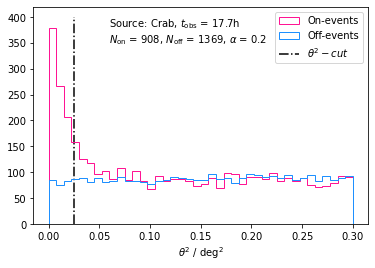

In [32]:
crab_events_sel_on = np.array(crab_events_sel_plot['theta_deg'].values)
plt.hist((crab_events_sel_on)**2, bins =40, histtype='step', color='deeppink', label='On-events')

plt.hist(np.array(theta_deg_off)**2, bins=40, histtype='step', color='dodgerblue', label='Off-events', weights=np.array([0.2 for el in theta_deg_off]))
plt.vlines(0.025, color='black', linestyle='-.', ymin=0, ymax=400, label=r'$\theta^{2}-cut$')
plt.xlabel(r'$\theta^2$ / $\deg^2$')
plt.legend()
plt.text(0.06, 350,
         r'''Source: Crab, $t_\mathrm{{obs}}$ = 17.7h
$N_\mathrm{{on}}$ = {non}, $N_\mathrm{{off}}$ = {noff}, $\alpha$ = 0.2'''.format(non=len(crab_events_sel), noff=len(bkg)))
plt.savefig('On_Off2.pdf')
print(len(crab_events_sel_1.theta_deg_off_1.values))

In [10]:
alpha = 0.2
n_on = len(crab_events_sel)
n_off = len(bkg)
sum1 = n_on * np.log((1 + alpha) / alpha * (n_on / (n_on + n_off)))
sum2 = n_off * np.log((1 + alpha) * (n_off / (n_on + n_off)))
S = np.sqrt(2) * np.sqrt(sum1 + sum2)
S

26.275871877931035

In [11]:
gammas_pred = gamma_events[gamma_events['gamma_prediction'] > 0.8]
gammas_sel = gammas_pred[gammas_pred['theta_deg'] < lim_theta]

In [12]:
gamma_Epred = gammas_sel['gamma_energy_prediction']
corsika_totalE = gammas_sel['corsika_event_header_total_energy']

max_bin = max(max(gamma_Epred), max(corsika_totalE))
min_bin = min(min(gamma_Epred), min(corsika_totalE))

if max_bin<= max(np.logspace(np.log10(500), np.log10(20e3), 11)):
    next_bin = 12
    bins_1 = np.ones(next_bin)
else:
    next_bin = 13
    bins_1 = np.ones(next_bin)
    bins_1[-1] = 50e3
bins_1[0] = 0
for i in range(1, next_bin-1, 1):
    bins_1[i] = np.logspace(np.log10(500), np.log10(15e3), 11)[i-1]

In [13]:
bins1 = np.ones(8)
bins1[0] = 0
for i in range(1, 7, 1):
    bins1[i] = np.logspace(np.log10(500), np.log10(15e3), 6)[i-1]
bins1[-1] = 50e3

<Figure size 432x288 with 0 Axes>

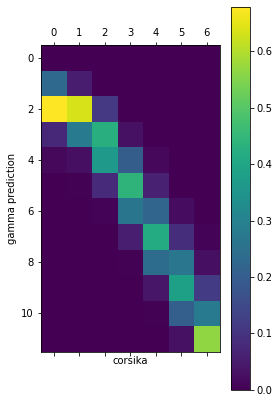

In [14]:
plt.figure(constrained_layout=True)
matrix, xedge, yedge = np.histogram2d(gamma_Epred, corsika_totalE, bins=[bins_1, bins1])

matrix = matrix / np.sum(matrix, axis=0)
# print(matrix)
plt.matshow(matrix)
plt.xlabel('corsika')
plt.ylabel('gamma prediction')
plt.colorbar()
plt.savefig('Matrix.pdf')

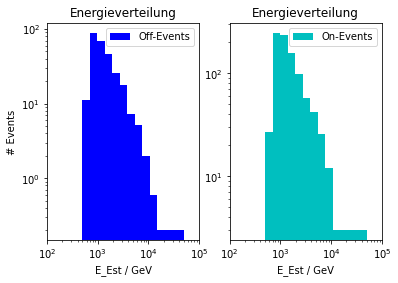

In [15]:
plt.subplot(1, 2, 1)
a = np.full_like(bkg['gamma_energy_prediction'], 0.2)
b, bins_b, p = plt.hist(bkg['gamma_energy_prediction'], bins=xedge, weights=a, color='b', label='Off-Events')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2, 1e5)
plt.xlabel('E_Est / GeV')
plt.ylabel('# Events')
plt.legend()
plt.title('Energieverteilung')
plt.subplot(1, 2, 2)
g, bins_g, p = plt.hist(crab_events_sel['gamma_energy_prediction'], bins=xedge, color='c', label='On-Events')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2, 1e5)
plt.xlabel('E_Est / GeV')
plt.legend()
plt.title('Energieverteilung')
plt.savefig('E_verteilung.pdf')

In [34]:
# svd entfaltung
from scipy.stats import poisson
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from uncertainties import unumpy as unp

pseudo_inv = unp.ulinalg.pinv(matrix)
print(pseudo_inv)
from uncertainties import ufloat

g_unc = np.array([ufloat(x, np.sqrt(x)) for x in g])
b_unc = np.array([ufloat(x, np.sqrt(x)) for x in b])

# entfaltung JETZT
ev = g-b
ev_unc = g_unc - b_unc
fNSVD = pseudo_inv@ev
fNSVD_unc = pseudo_inv.dot(ev_unc)[1:-1]
print(fNSVD)
print(fNSVD_unc)
fNSVD = fNSVD[1:-1]
print('fNSVD: ', fNSVD)

[[-1.09680173e-15  3.67026028e+00  3.70914269e-01 -1.72583365e+00
   1.99119817e+00 -5.31961583e-01 -4.76535113e-01  2.09981307e-01
   1.25408197e-01 -8.48608370e-02 -4.48368334e-02  3.34308740e-02]
 [ 1.32951507e-15 -3.90480604e+00  1.18115318e+00  1.88410598e+00
  -2.70024946e+00  7.40921917e-01  6.55078307e-01 -2.88991971e-01
  -1.72498058e-01  1.16701059e-01  6.16657960e-02 -4.59724567e-02]
 [-4.27125389e-16  1.25722623e+00 -5.66334524e-01  8.53045349e-01
   2.07471393e+00 -7.04717127e-01 -5.58180686e-01  2.49845354e-01
   1.48037729e-01 -1.00180316e-01 -5.29527431e-02  3.94440485e-02]
 [ 3.33764419e-17 -4.38839092e-01  1.87265067e-01 -3.56133814e-01
  -9.58822486e-02  1.89596004e+00  8.69905052e-01 -5.90367604e-01
  -3.00161403e-01  2.26239202e-01  1.17069325e-01 -8.80127757e-02]
 [ 2.97201291e-17  1.50361191e-01 -6.33239475e-02  1.20318885e-01
  -2.02659416e-03 -5.87120043e-01  5.46667820e-01  1.91946632e+00
   6.13331628e-01 -7.26104744e-01 -3.47997849e-01  2.75104735e-01]
 [ 2.

In [17]:
xpos = [yedge[i] - (yedge[i] - yedge[i-1])/2 for i in range(1, len(yedge))]
xpos = xpos[1:-1]
xerr = [(yedge[i] - yedge[i-1])/2 for i in range(2, len(yedge)-1)]

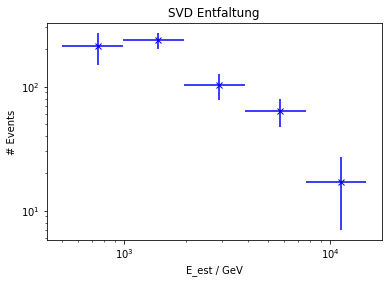

In [18]:
plt.errorbar(xpos, [x.nominal_value for x in fNSVD_unc], xerr=xerr, yerr=[x.std_dev for x in fNSVD_unc], fmt='bx')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_est / GeV')
plt.ylabel('# Events')
plt.title('SVD Entfaltung')
plt.savefig('NSVD.pdf')

In [36]:
# poisson likelihood UnFoLiNg
def PoiHoodEntf(f, A, b, g):
    lam = A@f + b
    return -poisson.logpmf(g, lam).sum()

f, yedges = np.histogram(gamma_Epred, bins=yedge)
Bounds = [(1, 100000)]*len(f)

estimator = minimize(PoiHoodEntf, f+100, args=(matrix, b, g), method='L-BFGS-B', bounds=Bounds)
fLike = estimator['x']
fLike_plot = estimator['x'][1:-1]

Hesse_inv = estimator['hess_inv'].todense()
print(fLike_plot)
print('cov matrix: ', Hesse_inv)

[188.74639742 241.08359446  99.47169522  67.20560448  13.37277384]
cov matrix:  [[ 8.48177345e+02 -1.02755801e+03  2.66934581e+02 -3.11169653e+01
   1.52010133e+01 -1.29205620e+01  2.21546262e+00]
 [-1.02755801e+03  1.67899283e+03 -3.37658376e+02  3.76711351e+01
  -2.48550989e+01  1.83605946e+01  7.74475540e+00]
 [ 2.66934581e+02 -3.37658376e+02  2.46574195e+02 -4.12416684e+01
   5.39000119e+01 -4.53633545e+00 -1.31495791e+01]
 [-3.11169653e+01  3.76711351e+01 -4.12416684e+01  3.14853434e+02
  -1.15559877e+02  9.74869504e+00  4.76577915e-01]
 [ 1.52010133e+01 -2.48550989e+01  5.39000119e+01 -1.15559877e+02
   1.93824758e+02 -4.68983099e+01  5.59121846e+00]
 [-1.29205620e+01  1.83605946e+01 -4.53633545e+00  9.74869504e+00
  -4.68983099e+01  3.89390430e+01 -5.08580971e+00]
 [ 2.21546262e+00  7.74475540e+00 -1.31495791e+01  4.76577915e-01
   5.59121846e+00 -5.08580971e+00  6.99845060e+00]]


In [39]:
diag_cov = np.diag(Hesse_inv)
diag_cov_sqrt = np.sqrt(diag_cov)
print(diag_cov_sqrt[1:-1])
std_devs = diag_cov_sqrt[1:-1]

[40.97551499 15.70268115 17.74410983 13.92209604  6.24011562]


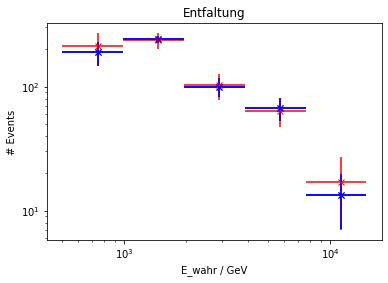

In [21]:
plt.errorbar(xpos, fLike_plot, xerr=xerr, yerr=std_devs, fmt='bx')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_wahr / GeV')
plt.ylabel('# Events')
plt.title('Entfaltung')
plt.savefig('Entfaltung_2.pdf')

plt.errorbar(xpos, fNSVD, xerr=xerr, yerr=[x.std_dev for x in fNSVD_unc], fmt='rx')
plt.errorbar(xpos, fLike_plot, xerr=xerr, yerr=std_devs, fmt='bx')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E_wahr / GeV')
plt.ylabel('# Events')
plt.title('Entfaltung')
plt.savefig('Entfaltung_vgl.pdf')

In [22]:
#Zufallszahlen mit Multivarianten Gauss 
fLike_Var = np.random.multivariate_normal(fLike, Hesse_inv, size=10000)
fLike_Var = fLike_Var[:,1:-1]
fLike_Var[:, 0]
std_devs = np.ones(5)
for i in range(5):
    std_devs[i] = np.std(fLike_Var[:, i])
print(std_devs)

[40.78711964 15.70602932 17.9812369  13.92231714  6.19905858]


In [23]:
def flux(f, A, dE, t):
    return f / (A * dE * t)

t_obs = crab_runs['ontime'].sum()

Delta_E = np.diff(yedge[1:-1]*10**(-3))

In [24]:
# detektorflaeche fuer effektive flaeche
A = np.pi * 27000**2
# N_sel / N_dim
hist_sel, yedges = np.histogram(gamma_Epred, bins=yedge)
hist_sim, yedges = np.histogram(corsika_events['total_energy'], bins=yedge)

A_eff = hist_sel[1:-1] / hist_sim[1:-1] * A / 0.7
print('A_eff: ', A_eff)

A_eff:  [3.14066687e+07 2.44481124e+08 4.32338918e+08 5.49470259e+08
 5.50166488e+08]


Phi_NSVD: [2.1529103594521411e-10+/-6.234619325009738e-11
 1.5700178306895414e-11+/-2.4480673012440442e-12
 1.9557502946367194e-12+/-4.619800313289931e-13
 4.827171621152915e-13+/-1.2573622609198917e-13
 6.503748445570554e-14+/-3.823824761946384e-14]
Phi_Like: [1.93304841e-10 1.60651211e-11 1.89850881e-12 5.11180738e-13
 5.14536627e-14]
Mean: [1.93037710e-10 1.60684895e-11 1.89678679e-12 5.10774176e-13
 5.13352210e-14]
Std: [4.17721756e-11 1.04660487e-12 3.43188448e-13 1.05896233e-13
 2.38517658e-14]


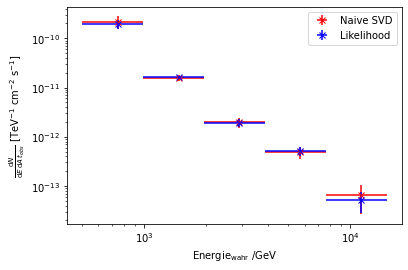

In [25]:
#Berechnung des Flusswertes
phi_NSVD = fNSVD_unc/(A_eff * Delta_E * t_obs)
phi_Like = fLike_plot/(A_eff * Delta_E * t_obs)

#Mittelwert und Standardabweichung
phi_Like_Var = fLike_Var/(A_eff * Delta_E * t_obs)
mean = phi_Like_Var.mean(axis=0)
std = phi_Like_Var.std(axis=0)
print('Phi_NSVD:', phi_NSVD)
print('Phi_Like:', phi_Like)
print('Mean:',mean)
print('Std:',std)

plt.errorbar(xpos, [x.nominal_value for x in phi_NSVD], xerr=xerr, yerr=[x.std_dev for x in phi_NSVD], fmt ='rx', label='Naive SVD')
plt.errorbar(xpos, phi_Like, xerr=xerr, yerr=std, fmt ='bx', label='Likelihood') 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energie$_\mathrm{wahr}$ /GeV')
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E \, \mathrm{d}A \, t_{obs}}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.savefig('Fluss.pdf')

In [26]:
def func(x, a, b, c, d):
     return a * (x/b) ** (-c + d * np.log(x/b))

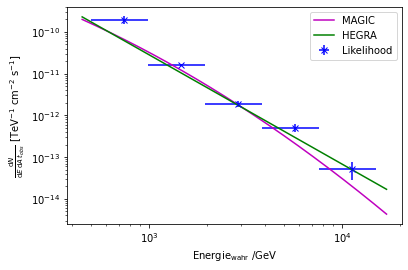

In [27]:
x = np.linspace(450, 17000, 10000)
y = func(x, 3.23*10**(-11), 1000, 2.47,-0.24)
phi_hegra = func(x, 2.83*10**(-11), 1000, 2.62, 0)
plt.plot(x, y, 'm-', label='MAGIC')  
plt.plot(x, phi_hegra, 'g-', label='HEGRA')
plt.errorbar(xpos, mean, yerr = std, xerr=xerr, fmt='bx', label='Likelihood')
#plt.fill_between(yedge[1:-1],mean-std,mean+std,facecolor='b',alpha=0.2, label='$1 \sigma$-Umgebung') 
#plt.fill_betweenx(mean, yedge[1:-1]-[(yedge[i] - yedge[i-1])/2 for i in range(1,len(yedge)-1)], yedge[1:-1]+[(yedge[i] - yedge[i-1])/2 for i in range(1,len(yedge)-1)],facecolor='b',alpha=0.2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energie$_\mathrm{wahr}$ /GeV')
plt.ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E \, \mathrm{d}A \, t_{obs}}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.savefig('Fluss_Like.pdf')